In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
import IPython.display as ipd
from scipy.io import wavfile
import os
import librosa

** Bigger Dataset **

Merging multiple datasets from different sources 

Please state sources here: (zeeshan bhai knows)

- **Do not run this section**

In [ ]:
train = pd.read_csv('train.csv')

In [34]:
train.head()

,fname,label,manually_verified
0,00044347.wav,Hi-hat,0
1,001ca53d.wav,Saxophone,1
2,002d256b.wav,Trumpet,0
3,0033e230.wav,Glockenspiel,1
4,00353774.wav,Cello,1


In [35]:
train.drop('manually_verified',inplace=True, axis=1)

In [36]:
newGunShotLocs = os.listdir('./dataset/train/train_gunshots/')
newGunShotLocs.extend(os.listdir('./dataset/test/gunshots/'))

In [37]:
newShatterLocs = os.listdir('./dataset/train/train_glass/')
newShatterLocs.extend(os.listdir('./dataset/test/glass/'))

In [38]:
newScreamsLocs = os.listdir('./dataset/train/train_screams/')
newScreamsLocs.extend(os.listdir('./dataset/test/screams/'))

In [40]:
newBackGroundLocs = os.listdir('./dataset/train/train_background/')
newBackGroundLocs.extend(os.listdir('./dataset/test/background/'))
newBackGroundLocs.extend(os.listdir('./dataset/background_dataset/'))

In [41]:
newGunShot = pd.DataFrame(data = dict(fname = newGunShotLocs , label = 'Gunshot_or_gunfire'))
newShatter = pd.DataFrame(data = dict(fname =  newShatterLocs, label = 'Shatter'))
newScreams = pd.DataFrame(data = dict(fname = newScreamsLocs , label = 'Screams'))
newBackGround = pd.DataFrame(data = dict(fname = newBackGroundLocs , label = 'backGround'))

In [42]:
print('New Gunshot Samples = ',newGunShot.shape[0])
print('New Shatter Samples = ',newShatter.shape[0])
print('New Scream Samples = ',newScreams.shape[0])
print('New BackGround Samples = ',newBackGround.shape[0])

New Gunshot Samples =  8000
New Shatter Samples =  8000
New Scream Samples =  8000
New BackGround Samples =  9496


In [43]:
print('Total Samples previously = ', train.shape[0])

Total Samples previously =  9473


In [44]:
train = pd.concat([train, newGunShot,newBackGround,newScreams,newShatter],ignore_index=True)

In [45]:
del [newGunShot,newBackGround,newScreams,newShatter]

In [46]:
print('Total Samples after new dataset addition = ', train.shape[0])

Total Samples after new dataset addition =  42969


In [ ]:
train.to_csv('./BigDataset/000 - WholeDataSetWithLabels.csv')

**The datasets are now merged and the total samples are now** *42969*

## Exploring the dataset

Load the dataset using following command:

In [26]:
ds = pd.read_csv('./BigDataset/000 - WholeDataSetWithLabels.csv',index_col=0)

In [27]:
ds.head()

,fname,label
0,00044347.wav,notAGunshot
1,001ca53d.wav,notAGunshot
2,002d256b.wav,notAGunshot
3,0033e230.wav,notAGunshot
4,00353774.wav,notAGunshot


**Missing values**

In [13]:
ds.isnull().any()

fname                False
label                False
manually_verified    False
dtype: bool

None

**Duplicate values**

In [14]:
ds.duplicated().any()

False

None

**Play First File**

The first file is labelled as Hi-hat.

We can play the first file:

In [15]:
ipd.Audio(filename="./BigDataset/"+ds['fname'][0]) #Hi-Hat

**Training labels**

In [16]:
print('Unique labels: ', ds['label'].unique())
print('\nNumber of unique labels: ', ds['label'].nunique())

Unique training labels:  ['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']

Number of unique training labels:  41


Our model has to be robust to all of these environmental noises

In [17]:
print('Number of Total Samples: ', ds.shape[0])

Number of training examples:  9473


A particular challenge of this dataset is that not all the labels are manually verified:

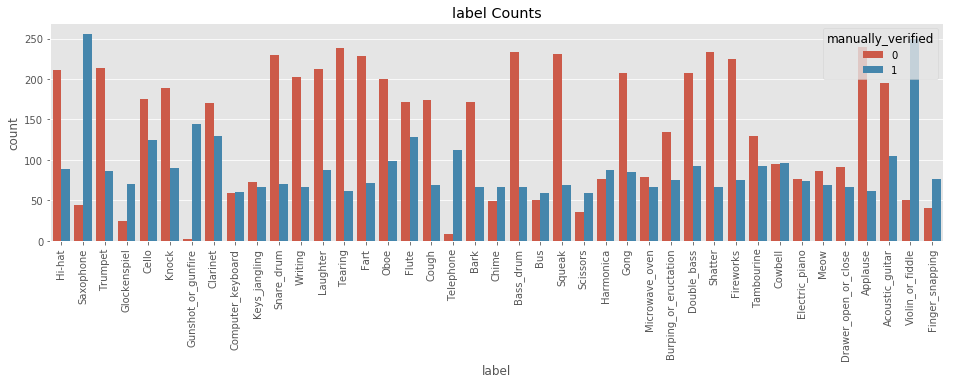

In [18]:
_ , ax = plt.subplots(figsize = (16,4))
sns.countplot(x='label',data=ds,ax=ax)
plt.xticks(rotation=90);
plt.title('label Counts')

### Exploring the sound files

In [19]:
#gun shot examples
ds[ds['label']=='Gunshot_or_gunfire'].index[:10]

Int64Index([7, 68, 98, 189, 278, 320, 371, 426, 487, 514], dtype='int64')

In [20]:
ipd.Audio(filename="./BigDataset/"+ds['fname'][98]) #Gun shot

In [21]:
#gun shot examples
ds[ds['label']=='Shatter'].index[:10]

Int64Index([49, 56, 64, 120, 127, 168, 183, 191, 298, 329], dtype='int64')

In [22]:
ipd.Audio(filename="./audio_ds/"+ds['fname'][120]) #Glass Shatter

File characteristics:

In [24]:
rate, data = wavfile.read("./BigDataset/"+ds['fname'][98])
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print("Duration = ", data.shape[0]/rate)
print('Time series = ',data)

Sampling (frame) rate =  44100
Total samples (frames) =  (23814,)
Duration =  0.54
Time series =  [-3  5 11 ... -2  0 -1]


how the waveform looks like?

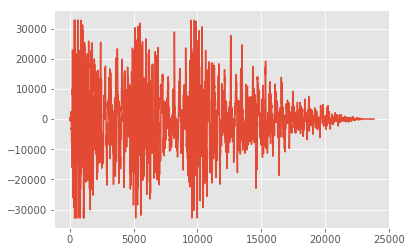

In [25]:
plt.plot(data)

zoom

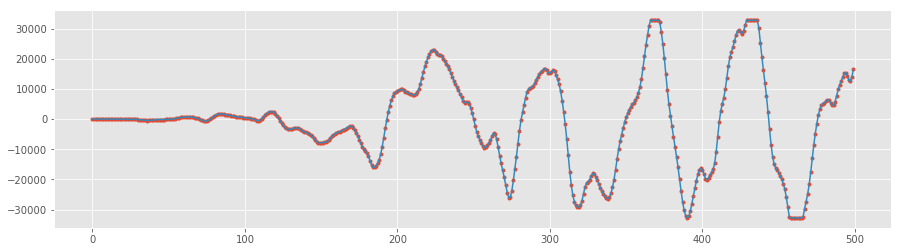

In [26]:
_, ax = plt.subplots(figsize=(15,4))
ax.plot(data[:500],'.')
ax.plot(data[:500],'-')

**Making time series for every file**

Not enough RAM; do not run wihout atleast 30GB RAM free

In [12]:
def genTimeSeries(path,SAMPLE_RATE):
    wav, _ = librosa.core.load("./BigDataset/"+path, sr=SAMPLE_RATE)
    return wav

In [28]:
#ds['time_series'] = ds['fname'].apply(genTimeSeries)    
#ds['nframes'] = ds['time_series'].apply(len) 

In [29]:
#ds.head()

I will make time series on the go and delete the previous used to save RAM

Gun Shots: 


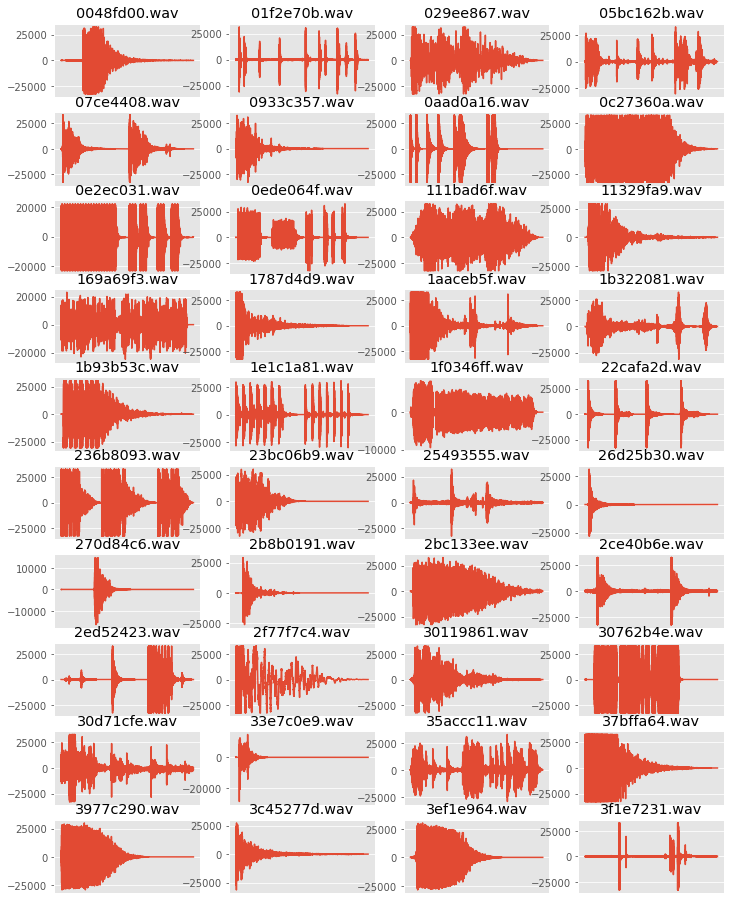

In [31]:
print("Gun Shots: ")
fig, ax = plt.subplots(10, 4, figsize = (12, 16))
for i in range(40):
    ax[i//4, i%4].plot(genTimeSeries(ds[ds['label']=='Gunshot_or_gunfire']['fname'].iloc[i]))
    ax[i//4, i%4].set_title(ds[ds['label']=='Gunshot_or_gunfire']['fname'].iloc[i])
    ax[i//4, i%4].get_xaxis().set_ticks([])
fig.savefig("AudioWaveform", dpi=900)     

In [32]:
ipd.Audio(filename="./BigDataset/"+'0c27360a.wav') #Gun shot

In [33]:
ipd.Audio(filename="./BigDataset/"+ds['fname'][54]) #Dog Bark for contrast

In [47]:
ds.head()

,fname,label
0,00044347.wav,Hi-hat
1,001ca53d.wav,Saxophone
2,002d256b.wav,Trumpet
3,0033e230.wav,Glockenspiel
4,00353774.wav,Cello


Making this a binary class problem by merging the class labels to either gunshot or not

In [49]:
ds['label'].value_counts()

backGround               9496
Shatter                  8300
Gunshot_or_gunfire       8147
Screams                  8000
Applause                  300
Fireworks                 300
Bass_drum                 300
Squeak                    300
Fart                      300
Violin_or_fiddle          300
Flute                     300
Tearing                   300
Clarinet                  300
Cello                     300
Double_bass               300
Snare_drum                300
Hi-hat                    300
Laughter                  300
Trumpet                   300
Saxophone                 300
Acoustic_guitar           300
Oboe                      299
Gong                      292
Knock                     279
Writing                   270
Cough                     243
Bark                      239
Tambourine                221
Burping_or_eructation     210
Cowbell                   191
Harmonica                 165
Drawer_open_or_close      158
Meow                      155
Electric_p

In [52]:
ds['label'][ds['label'] != 'Gunshot_or_gunfire'] = 'notAGunshot'

In [53]:
ds['label'].value_counts()

notAGunshot           34822
Gunshot_or_gunfire     8147
Name: label, dtype: int64

In [ ]:
ds.to_csv('./BigDataset/000 - WholeDataSetWithLabels.csv')

## Extracting Features

In [3]:
ds = pd.read_csv('./BigDataset/000 - WholeDataSetWithLabels.csv')

In [4]:
#gun shot examples
ds[ds['label']=='Gunshot_or_gunfire'].index[:10]

Int64Index([7, 68, 98, 189, 278, 320, 371, 426, 487, 514], dtype='int64')

In [58]:
ipd.Audio(filename="./BigDataset/"+ds['fname'][514]) #Gun shot

In [14]:
SAMPLE_RATE = 44100

In [100]:
TimeSeriesGunRough = genTimeSeries(ds[ds['label']=='Gunshot_or_gunfire']['fname'].iloc[9],SAMPLE_RATE)

In [104]:
TimeSeriesGunRough.shape

(341334,)

In [78]:
mfcc = librosa.feature.mfcc(wav, sr = SAMPLE_RATE, n_mfcc=40)
mfcc.shape

(40, 667)

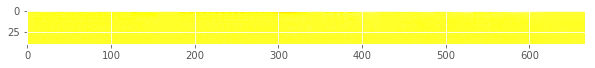

In [97]:
plt.figure(figsize = (10,6))
plt.imshow(mfcc, cmap='hot', interpolation='nearest');

In [90]:
np.save('check size and del', mfcc)

In [91]:
mfcc

array([[-5.80719144e+02, -5.80719144e+02, -5.80719144e+02, ...,
        -5.75517008e+02, -5.77277452e+02, -5.80691019e+02],
       [-3.90798505e-14, -3.90798505e-14, -3.90798505e-14, ...,
         7.22083890e+00,  4.75274775e+00,  3.83335192e-02],
       [ 3.19744231e-14,  3.19744231e-14,  3.19744231e-14, ...,
         6.81889901e+00,  4.41574551e+00,  3.41178886e-02],
       ...,
       [ 2.05169215e-13,  2.05169215e-13,  2.05169215e-13, ...,
         1.20478818e+00,  7.06265097e-01, -2.69647891e-02],
       [ 1.28785871e-13,  1.28785871e-13,  1.28785871e-13, ...,
         1.11624044e+00,  7.20916982e-01, -2.05909455e-02],
       [-1.19904087e-13, -1.19904087e-13, -1.19904087e-13, ...,
         1.03519623e+00,  7.37964346e-01, -1.27815611e-02]])

Extracting MFCC for some of the files

In [107]:
subData = ds.sample(500)
subData.head()

,fname,label
22809,backgroundBatchB (4455).wav,notAGunshot
40045,glassBatchC (5568).wav,notAGunshot
40291,glassBatchC (749).wav,notAGunshot
26063,backgroundBatchB (7384).wav,notAGunshot
1804,320f812b.wav,notAGunshot


In [108]:
subData['time_series'] = subData['fname'].apply(genTimeSeries, SAMPLE_RATE = SAMPLE_RATE)    
subData['nframes'] = subData['time_series'].apply(len)
subData['MFCC'] = subData['time_series'].apply(librosa.feature.mfcc, sr = SAMPLE_RATE, n_mfcc=40)

**WE SHOULD DIVIDE IN TRAIN TEST BEFORE THIS OTHERWISE IT WILL BE SNOOPING**

Infering the best time to crop audios from the data

Should have just taken a random sample from the data

In [19]:
ds['nframes'] = ds['fname'].apply(lambda f: genTimeSeries(f, SAMPLE_RATE).shape[0]/SAMPLE_RATE)

In [25]:
ds.head()

,fname,label,nframes
0,00044347.wav,notAGunshot,14.00
1,001ca53d.wav,notAGunshot,10.32
2,002d256b.wav,notAGunshot,0.44
3,0033e230.wav,notAGunshot,8.00
4,00353774.wav,notAGunshot,4.52


In [28]:
ds.to_csv('./BigDataset/000 - WholeDataSetWithLabels.csv')

In [29]:
ds = pd.read_csv('./BigDataset/000 - WholeDataSetWithLabels.csv',index_col=0)

In [31]:
ds.head()

,fname,label,nframes
0,00044347.wav,notAGunshot,14.00
1,001ca53d.wav,notAGunshot,10.32
2,002d256b.wav,notAGunshot,0.44
3,0033e230.wav,notAGunshot,8.00
4,00353774.wav,notAGunshot,4.52


In [37]:
ds.describe()

,nframes
count,42969.000000
mean,2.910895
std,3.983202
min,0.300000
25%,0.999977
50%,1.999977
75%,2.999977
max,30.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006FDF8FC208>]],
      dtype=object)

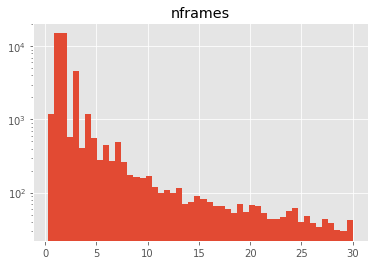

In [36]:
ds.hist('nframes',log=True,bins=50)

In [110]:
subData.head()

,fname,label,time_series,nframes,MFCC
22809,backgroundBatchB (4455).wav,notAGunshot,"[0.00037275266, 0.00063767773, -0.0012319147, ...",43748,"[[-247.67455930247056, -233.88312438361473, -2..."
40045,glassBatchC (5568).wav,notAGunshot,"[-0.0006689616, 0.034934748, 0.0664295, 0.0539...",88199,"[[-124.894200149439, -118.09450504113784, -113..."
40291,glassBatchC (749).wav,notAGunshot,"[0.017026683, 0.01880398, 0.021204645, 0.02801...",132299,"[[-302.27085037051296, -314.41681717553837, -3..."
26063,backgroundBatchB (7384).wav,notAGunshot,"[0.00059006084, -0.0006811783, 7.316584e-05, 0...",43748,"[[-332.2085189211638, -332.501780287236, -337...."
1804,320f812b.wav,notAGunshot,"[0.0002746582, 0.00030517578, 0.00033569336, 0...",242550,"[[-589.7365581659789, -579.8514432107589, -543..."


In [111]:
subData.to_csv('SomeSamplesWithMFCC.csv')